**Segundo parcial. Métodos computacionales.**

Dayana Andrea Henao Arbelaéz.

1001469185

### Link a éste GitHub en classroom → ClassWork → Examenes

A)
1. Cree una función en Python que defina la función
$$
f(\lambda)=\int_0^\infty \frac{\sin(\lambda x)}{\operatorname{e}^x}\operatorname{d}x
$$
1. Gráfique dicha función para $\lambda$ entre 0 y 100
1. Haga un segundo gráfico añadiendo la derivada de la función

Sugerencia: Ignore los "WARNINGS" de Scipy

B)
Construya una matriz aleatoria $3\times 3$ $\boldsymbol{Y}$ y genere la matrix
$$
\boldsymbol{A}=\boldsymbol{Y}^{\operatorname{T}}\boldsymbol{Y}
$$

1. Obtenga los autovalores y autovectores de $\boldsymbol{A}$ en orden ascendente en valor absoluto
1. Compruebe que los atovalores de $\boldsymbol{Y}$ corresponden a la raíz cuadrado de los autovalores de  $\boldsymbol{A}$ y explique porqué

In [549]:
#Importo las librerias que voy a utilizar
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
import scipy
import sympy

**Primer punto**

1) Crear la función

In [550]:
#Defino la función f(λ)
def f(λ):
  return integrate.quad(lambda x:(np.sin(λ*x))/(np.exp(x)),0,np.inf)[0]

In [551]:
#Vectorizo la función para que pueda evaluar varios valores a la vez
fv=np.vectorize(f)

2) Gráfica de la función

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  This is separate from the ipykernel package so we can avoid doing imports until


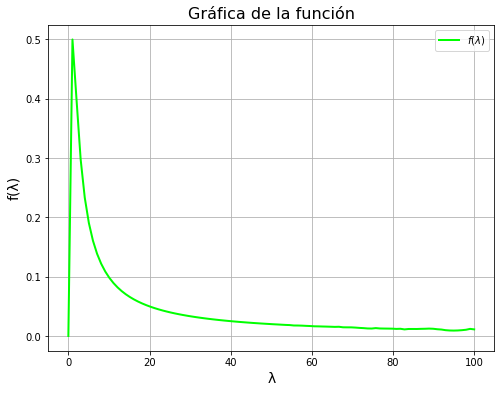

In [552]:
#Grafico la función 
λ=np.linspace(0,100,100)
plt.figure(figsize=(8,6))
plt.plot(λ,fv(λ), label='$f(\lambda)$',linewidth = 2, color='lime')
plt.title('Gráfica de la función', size=16)
plt.xlabel('λ',size=14)
plt.ylabel('f(λ)', size=14)
plt.legend()
plt.grid()

In [553]:
#Derivo la función
def df(x):
  return misc.derivative(fv,λ)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/py

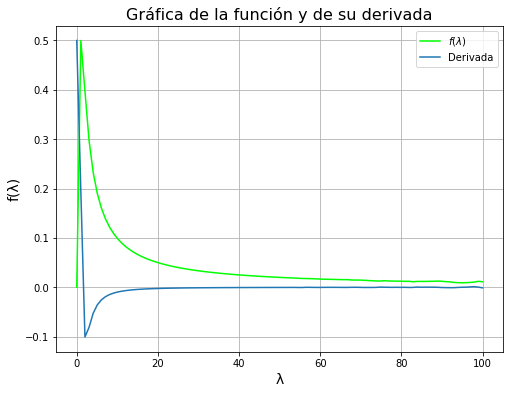

In [554]:
#Grafico la derivada y la función
plt.figure(figsize=(8,6))
plt.plot(λ,fv(λ), label='$f(\lambda)$', color='lime')
plt.plot(λ,df(λ), label='Derivada')
plt.title('Gráfica de la función y de su derivada', size=16)
plt.xlabel('λ',size=14)
plt.ylabel('f(λ)', size=14)
plt.legend()
plt.grid()

**Segundo punto**

In [555]:
#Matriz Y
np.random.seed(1001469185)
Y=np.random.uniform(0,1,(3,3))
sympy.Matrix(Y)

Matrix([
[0.0523826111408197, 0.477206322747497, 0.393536734338643],
[0.0597272198082208, 0.338216487391589, 0.111706778042222],
[  0.43780128061137,  0.19753672180593, 0.391624524087487]])

In [556]:
#Matriz Y transpuesta
Yt=Y.transpose()
sympy.Matrix(Yt)

Matrix([
[0.0523826111408197, 0.0597272198082208,  0.43780128061137],
[ 0.477206322747497,  0.338216487391589,  0.19753672180593],
[ 0.393536734338643,  0.111706778042222, 0.391624524087487]])

In [557]:
#Matriz A
A=Yt@Y
sympy.Matrix(A)

Matrix([
[0.197981240040905, 0.131679873498033, 0.198740135175005],
[0.131679873498033, 0.381137023275526, 0.302939516614124],
[0.198740135175005, 0.302939516614124, 0.320719333401249]])

1) Autovalores y autovectores de A en orden ascendente

In [558]:
Λ,V=np.linalg.eig(A)
Λ=np.array([Λ[i] for i in np.abs(Λ).argsort()])
V=np.c_[ tuple( [ np.c_[V[:,i]]    for i in np.abs(Λ).argsort() ] ) ]

In [559]:
Λ

array([0.01254127, 0.13482994, 0.75246638])

In [560]:
V

array([[-0.3872907 , -0.78028904, -0.49107528],
       [-0.66137186,  0.60623124, -0.44166836],
       [-0.64233416, -0.15372932,  0.75084893]])

b) Comprobación

In [561]:
#Autovalores de A
ΛA=scipy.linalg.svd(A)[1]
ΛA

array([0.75246638, 0.13482994, 0.01254127])

In [562]:
#Autovalores de Y
ΛY=scipy.linalg.svd(Y)[1]
ΛY

array([0.8674482 , 0.36719197, 0.11198782])

In [563]:
lista=[]
for i in ΛA:
  lista.append(np.sqrt(i))
  

In [564]:
print(lista)

[0.8674482023326039, 0.3671919668385546, 0.11198782289538528]


Se puede notar que los autovalores de la matriz **Y** corresponden a la raíz cuadrada de los autovalores de **A**

Esto se debe a que una matriz **A** puede ser formada por la multiplicación de una matriz cuadrada **Y** y su transpuesta. Por teorema se garantiza que hay una matriz ortogonal **U** tal que $$
U^{\operatorname{T}} A U=U^{\operatorname{T}} Y^{\operatorname{T}}Y U=D_\lambda
$$
donde $$D_{\lambda}$$ Es la diagonal de la matriz **A** compuesta por sus autovalores.
Por propiedades del álgebra de matrices se puede concluir que:
$$
\begin{align}
 Y^{\operatorname{T}}Y =&U D_\lambda U^{\operatorname{T}}\\
 =&U D_{\sqrt{\lambda}} D_{\sqrt{\lambda}} U^{\operatorname{T}}\\
\end{align}
$$
donde
$$
D_{\sqrt{\lambda}}$$ Es la diagonal de la matriz **Y** compuesta por sus autovalores. Estos corresponden a la raíz cuadrada de los autovalores de la matriz **A**